# **Using pandas read_html to Web Scrape Data for Data Science** 


In this Jupyter notebook, how to easily web scrape data using pandas read_html() function for  data science projects will be taught. We will be web scraping NBA player stats data and perform a quick data exploration.

## **URL to the webpage "2020-21 NBA Player Stats: Per Game"**

### Method 1

We could modularize the URL and year strings of text that may be useful for programmatic access (in the subsequent code cell).

In [1]:
# The Building Blocks
year = '2021'
url_link = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

# Combining the URL + year strings together
url = url_link.format(year)
url

'https://www.basketball-reference.com/leagues/NBA_2021_per_game.html'

Now, let's programmatically return a list of URL given a list of years (e.g. 2017,2018...).

In [2]:
years = [2017,2018,2019,2020,2021]
url_link = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
  url = url_link.format(year)
  print(url)

https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html
https://www.basketball-reference.com/leagues/NBA_2020_per_game.html
https://www.basketball-reference.com/leagues/NBA_2021_per_game.html


Method 2

In [3]:
url = 'https://www.basketball-reference.com/leagues/NBA_2021_per_game.html'

## **Read HTML webpage into pandas**

In [4]:
import pandas as pd

### Using pd.read_html() function to read HTML webpage

In [5]:
df = pd.read_html(url, header = 0)
df

[      Rk             Player Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  \
 0      1   Precious Achiuwa  PF  21  MIA  61   4  12.1  2.0   3.7  ...  .509   
 1      2       Jaylen Adams  PG  24  MIL   7   0   2.6  0.1   1.1  ...   NaN   
 2      3       Steven Adams   C  27  NOP  58  58  27.7  3.3   5.3  ...  .444   
 3      4        Bam Adebayo   C  23  MIA  64  64  33.5  7.1  12.5  ...  .799   
 4      5  LaMarcus Aldridge   C  35  TOT  26  23  25.9  5.4  11.4  ...  .872   
 ..   ...                ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   ...   
 726  536       Delon Wright  PG  28  SAC  27   8  25.8  3.9   8.3  ...  .833   
 727  537     Thaddeus Young  PF  32  CHI  68  23  24.3  5.4   9.7  ...  .628   
 728  538         Trae Young  PG  22  ATL  63  63  33.7  7.7  17.7  ...  .886   
 729  539        Cody Zeller   C  28  CHO  48  21  20.9  3.8   6.8  ...  .714   
 730  540        Ivica Zubac   C  23  LAC  72  33  22.3  3.6   5.5  ...  .789   
 
      ORB  DRB  TRB  AST  

### How many tables are there in the webpage?

In [6]:
len(df)

1

### Select the first table

In [7]:
df[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0
727,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
728,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
729,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


In [8]:
df2021 = df[0]

## Data cleaning

We can see that the table header is presented multiple times in several rows.

In [9]:
df2021[df2021.Age == 'Age']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
28,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
51,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
76,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
106,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
132,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
163,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
190,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
213,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
238,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
267,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [10]:
len(df2021[df2021.Age == 'Age'])

26

In [11]:
df = df2021.drop(df2021[df2021.Age == 'Age'].index)

In [12]:
df.shape

(705, 30)

## Quick Exploratory Data Analysis

In [13]:
import seaborn as sns

Making the histogram

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


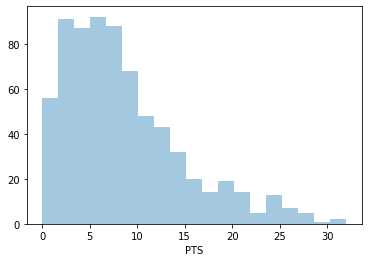

In [14]:
sns.distplot(df.PTS, 
             kde=False)

Change bar line color

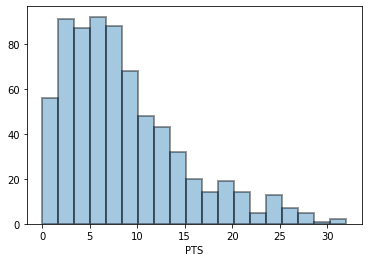

In [15]:
sns.distplot(df.PTS, 
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2))

Change bar fill colors

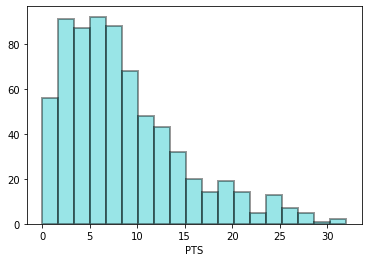

In [16]:
sns.distplot(df.PTS,
             kde=False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color='#00BFC4')